In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv") 

In [2]:
data.head(5)

ID painter1_time painter2_time painter3_time painter4_time painter5_time  \
0  25       567.443       589.258       871.075       424.541       640.152   
1  33      1424.242        63.744       356.716       325.936       105.141   
2  42      1320.878       183.888      1147.679       806.613       569.499   
3  58       897.658       681.745       368.636       727.118       723.261   
4  68      1078.837       611.756       462.712       763.973       627.325   

  painter6_time painter7_time painter8_time painter9_time  ...  \
0      1117.124       908.755       493.497       906.011  ...   
1       951.267      1160.728       155.481       899.991  ...   
2       904.191      1507.476       294.256       393.701  ...   
3      1070.142       874.328       636.127       592.833  ...   
4       789.635       576.564       297.831       535.604  ...   

  painter10_familiarity stress tired pay_off risk b_4 b_3 c_4 c_3 delay  
0                     1      1     1     454    2   0  37   5  11     2  
1                     1      2     2     507    2   5  31  12   6     2  
2                     1      1     1     434    1   0  24   9   7     1  
3                     1      0     0     566    2  12  40   5   9     1  
4                     1      0     0     268    1   0  16  19   4     2  

[5 rows x 40 columns]

In [3]:
import numpy as np
data[data==' ']=np.nan
data=data.dropna()
#data=np.int8

/afs/inf.ed.ac.uk/user/s18/s1883226/miniconda3/envs/mlp/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
stress=np.int8(data.iloc[:,31])

In [5]:
tired=np.int8(data.iloc[:,32])

In [6]:
st=np.int8(data.iloc[:,31:33])


In [7]:
choice3=data.iloc[:,37]
choice4=data.iloc[:,38]

In [8]:
tend=np.int8(choice3)+np.int8(choice4)

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(st, tend, test_size=0.2, random_state=0)


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lin_reg.predict(X_test)

array([18.53634441, 16.27604082, 19.52617448, 17.40619261, 16.27604082,
       17.40619261, 17.40619261, 16.27604082, 18.53634441, 17.40619261,
       16.41636254, 17.40619261, 17.40619261, 17.40619261, 16.27604082,
       16.27604082, 17.40619261, 17.40619261, 17.40619261, 17.40619261,
       17.26587089, 17.40619261])

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.289088436610462


-0.24953398982152786

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
X_poly_test = poly_reg.fit_transform(X_test)
pol_reg.predict(X_poly_test)

array([18.1817625 , 16.50276172, 20.4994216 , 17.27319274, 16.50276172,
       17.27319274, 17.27319274, 16.50276172, 18.1817625 , 17.27319274,
       16.28540419, 17.27319274, 17.27319274, 17.27319274, 16.50276172,
       16.50276172, 17.27319274, 17.27319274, 17.27319274, 17.27319274,
       16.98068652, 17.27319274])

In [15]:
mean_absolute_error(y_test, pol_reg.predict(X_poly_test))

4.28330928443235

In [16]:
r2_score(y_test, pol_reg.predict(X_poly_test))

-0.26409456749653515

In [17]:
poly_reg.powers_


array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

In [18]:
pol_reg.coef_

array([ 0.        ,  1.6212288 , -0.6829265 ,  0.06906937, -0.91986715,
        0.2050017 ])

In [19]:
from scipy.stats import burr

In [20]:
f=data.iloc[:,21:31]
f_e=np.zeros((106,10))
f_e[np.where(f=='0')]=burr.rvs(14.038027454242975,2088.291950538207,-6.573122747248534,398.27116774711067, size=f_e[np.where(np.array(f)=='0')].shape[0])/500
f_e[np.where(f=='1')]=burr.rvs(3.1963734941460253,0.6756158751301813,-5.541005126302264,770.0101084770896, size=f_e[np.where(np.array(f)=='1')].shape[0])/500
f_e[np.where(f=='2')]=burr.rvs(2.881819996766421,0.7423974676323387,-0.10643840038516461,600.8193288318848, size=f_e[np.where(np.array(f)=='2')].shape[0])/500
f_e[np.where(f=='3')] = burr.rvs(3.8823906071218754,0.39664109623209587,-4.321262183898044,666.6238719647567, size=f_e[np.where(np.array(f)=='3')].shape[0])/500
f_e[np.where(f=='4')] = burr.rvs(6.1030943196528735,0.21404856140204834,-3.2134669690041697,743.8724160581987, size=f_e[np.where(np.array(f)=='4')].shape[0])/500

In [21]:
np.hstack((np.int8(f),f_e))

array([[1.        , 4.        , 1.        , ..., 0.17576219, 1.28773938,
        0.95785381],
       [1.        , 2.        , 1.        , ..., 0.71496233, 1.66914918,
        0.55440208],
       [1.        , 2.        , 1.        , ..., 0.81403187, 0.8341787 ,
        0.81472449],
       ...,
       [2.        , 2.        , 1.        , ..., 0.38699294, 1.32270219,
        1.03909721],
       [2.        , 2.        , 1.        , ..., 0.81130129, 1.07420317,
        1.37879736],
       [1.        , 2.        , 1.        , ..., 3.22774957, 1.81820985,
        0.9860885 ]])

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(np.hstack((np.int8(f),f_e)), tend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
w=lin_reg.coef_

In [24]:
#stress and tiredness: y=259*x1+16*x2-38.897*x1**2-163.632*x1*x2-8.738*x2**2
# familarity and interaction fe: 

In [25]:
# np.int8(x1)**2

In [26]:
x1=stress
x2=tired
f1=1.6212288*np.int8(x1)-0.6829265*np.int8(x2)+0.06906937*np.int8(x1)**2-0.91986715*np.int8(x1)*np.int8(x2)+0.2050017*np.int8(x2)**2

In [27]:
f1

array([ 0.29250622, -0.70657972,  0.29250622,  0.        ,  0.        ,
        1.20107598,  0.        , -0.4779248 ,  0.29250622,  0.29250622,
       -0.4779248 ,  1.20107598, -0.4779248 ,  0.29250622, -0.4779248 ,
        0.        ,  1.20107598,  1.69029817,  0.        , -0.4779248 ,
        0.29250622,  0.        ,  0.29250622,  1.69029817, -0.4779248 ,
        3.51873508, -0.4779248 ,  0.29250622,  0.        ,  0.        ,
        0.29250622,  0.29250622, -0.4779248 ,  1.69029817,  0.        ,
        0.29250622, -0.4779248 ,  1.69029817,  1.69029817,  1.69029817,
        1.69029817,  0.29250622,  0.29250622,  0.        ,  0.29250622,
        0.29250622,  0.        ,  1.20107598, -0.69528233, -0.4779248 ,
       -0.69528233,  0.29250622, -0.4779248 , -0.4779248 ,  0.29250622,
        0.        ,  1.69029817,  0.        ,  0.29250622,  1.69029817,
        0.29250622,  1.69029817,  0.29250622, -0.4779248 ,  1.69029817,
        0.29250622,  1.69029817,  0.        , -0.69528233, -0.47

In [28]:
a=np.hstack((np.int8(f),f_e))

In [29]:
a.shape

(106, 20)

In [30]:
f2=np.sum(a*w,axis=1)

In [31]:
a=np.ones((4,3))
b=[1,2,3]
a*b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [32]:
np.vstack((f1,f2)).T

array([[  0.29250622,  -3.09322695],
       [ -0.70657972,  -1.25147751],
       [  0.29250622,  -4.34476532],
       [  0.        ,  -8.4335932 ],
       [  0.        ,  -3.65933643],
       [  1.20107598,  -0.56230918],
       [  0.        ,  -9.17726981],
       [ -0.4779248 ,  -5.36878292],
       [  0.29250622,  -8.80416145],
       [  0.29250622,  -4.20561449],
       [ -0.4779248 ,  -3.11916819],
       [  1.20107598,  -8.75816634],
       [ -0.4779248 , -10.52710291],
       [  0.29250622,  -8.22682611],
       [ -0.4779248 ,  -6.13417011],
       [  0.        ,  -2.2497386 ],
       [  1.20107598,  -8.22494935],
       [  1.69029817,  -0.90134067],
       [  0.        ,  -5.35982935],
       [ -0.4779248 ,  -6.42777433],
       [  0.29250622,  -5.6827286 ],
       [  0.        ,  -9.4824613 ],
       [  0.29250622,  -2.78544362],
       [  1.69029817,  -6.74043647],
       [ -0.4779248 ,  -3.38485023],
       [  3.51873508,  -2.23773636],
       [ -0.4779248 ,  -1.71661251],
 

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(np.vstack((f1,f2)).T, tend, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
lin_reg.predict(X_test)

array([18.73568748, 19.12311372, 18.70357372, 18.4919613 , 18.84218792,
       20.94476425, 14.8028123 , 16.74442512, 15.1731051 , 16.91029283,
       20.20848416, 20.14075062, 18.03009124, 24.30216489, 14.9303016 ,
       19.85785637, 14.38716344, 19.63753311, 20.42971379, 17.17187201,
       16.80813099, 13.77670291])

In [36]:
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

3.9603919774935665


-0.05553089184611104

In [37]:
D=np.hstack((np.int8(np.array(data.iloc[:,21:31])),np.int8(st)))

In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(D, tend, test_size=0.2, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.387252879571907


-0.28363890610676346

In [41]:
risk=data.iloc[:,34]

In [42]:
delay=data.iloc[:,39]

In [43]:
mm, X_test, t, y_test = train_test_split(risk, tend, test_size=0.2, random_state=0)
nn, X_test, t, y_test = train_test_split(delay, tend, test_size=0.2, random_state=0)

In [44]:
m=[mm=='1']
n=[nn=='1']

In [45]:
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
a[0]

array([ 0,  6,  7,  8, 11, 12, 14, 16, 17, 20, 25, 30, 31, 33, 36, 38, 39,
       40, 41, 42, 44, 45, 52, 55, 56, 57, 59, 61, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 75, 76, 78, 80, 82, 83])

In [46]:
tmp1 = [i for i in a[0] if i in b[0]]

In [47]:
tmp1

[0,
 6,
 7,
 11,
 12,
 14,
 16,
 17,
 20,
 30,
 31,
 36,
 42,
 52,
 61,
 68,
 69,
 70,
 71,
 72,
 73,
 76,
 78]

In [48]:
print(np.mean(t[tmp1]))
print(np.median(t[tmp1]))
counts = np.bincount(t[tmp1])
print(np.argmax(counts))

18.782608695652176
21.0
21


In [49]:
# tend[tmp1]
# plt.hist(t[tmp1])


In [50]:
m=[mm=='2']
n=[nn=='1']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp2 = [i for i in a[0] if i in b[0]]
tend[tmp2]
#plt.hist(t[tmp2])
print(np.mean(t[tmp2]))
print(np.median(t[tmp2]))
counts = np.bincount(t[tmp2])
print(np.argmax(counts))

16.166666666666668
16.0
14


17.55
16.0
9


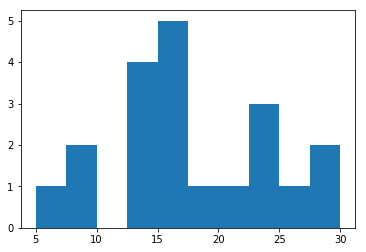

In [51]:
m=[mm=='1']
n=[nn=='2']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp3 = [i for i in a[0] if i in b[0]]
tend[tmp3]
plt.hist(t[tmp3])
print(np.mean(t[tmp3]))
print(np.median(t[tmp3]))
counts = np.bincount(t[tmp3])
print(np.argmax(counts))

16.91304347826087
17.0
17


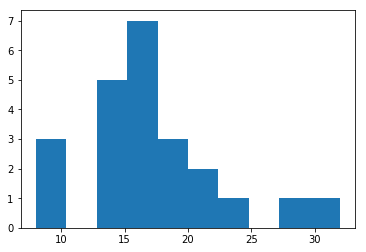

In [52]:
m=[mm=='2']
n=[nn=='2']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp4 = [i for i in a[0] if i in b[0]]
tend[tmp4]
plt.hist(t[tmp4])
print(np.mean(t[tmp4]))
print(np.median(t[tmp4]))
counts = np.bincount(t[tmp4])
print(np.argmax(counts))

In [53]:
t.shape

(84,)

In [54]:
f3=np.zeros(106)

In [55]:
f3[tmp1]=18.782608695652176
f3[tmp2]=16.166666666666668
f3[tmp3]=17.55
f3[tmp3]=16.91304347826087


In [56]:
m=[risk=='1']
n=[delay=='1']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp1 = [i for i in a[0] if i in b[0]]
m=[risk=='2']
n=[delay=='1']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp2 = [i for i in a[0] if i in b[0]]
m=[risk=='1']
n=[delay=='2']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp3 = [i for i in a[0] if i in b[0]]
m=[risk=='2']
n=[delay=='2']
a=np.array(np.where(np.array(m[0])==1))
b=np.array(np.where(np.array(n[0])==1))
tmp4 = [i for i in a[0] if i in b[0]]

In [57]:
f3[tmp1]=18.782608695652176
f3[tmp2]=16.166666666666668
f3[tmp3]=17.55
f3[tmp4]=16.91304347826087
f3=f3/20

In [58]:
ff3=np.zeros(106)
ff3[tmp1]=21.0
ff3[tmp2]=16.0
ff3[tmp3]=16.0
ff3[tmp4]=17


In [59]:
fff3=np.zeros(106)
fff3[tmp1]=21
fff3[tmp2]=14
fff3[tmp3]=9
fff3[tmp4]=17

In [60]:
F=np.vstack((f1,f2))
F=np.vstack((F,f3))

In [61]:
F=np.vstack((f1,f2))
F=np.vstack((F,ff3))

In [62]:
fff3=fff3/10
F=np.vstack((f1,f2))
F=np.vstack((F,fff3))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(F.T, tend, test_size=0.2, random_state=0)

In [64]:
y_train.shape

(84,)

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.012016691310097


-0.0417492485447728

In [67]:
f3=fff3

In [68]:
#\10
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.012016691310097


-0.0417492485447728

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.012016691310097


-0.0417492485447728

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.012016691310097


-0.0417492485447728

In [71]:
D=np.hstack((np.int8(np.array(data.iloc[:,21:31])),np.int8(st)))
D1=np.hstack((D,np.int8(np.array(risk).reshape(106,1))))
D2=np.hstack((D1,np.int8(np.array(delay).reshape(106,1))))
X_train, X_test, y_train, y_test = train_test_split(D2, tend, test_size=0.2, random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

4.440064772047479


-0.38428209843953653

In [73]:
time=np.float32(data.iloc[:,1:11])

In [74]:
time

array([[ 567.443,  589.258,  871.075, ...,  493.497,  906.011,  814.652],
       [1424.242,   63.744,  356.716, ...,  155.481,  899.991,  171.415],
       [1320.878,  183.888, 1147.679, ...,  294.256,  393.701,   73.736],
       ...,
       [1592.748,  363.483,  196.754, ...,  498.548,  839.545,  365.824],
       [1597.729,  527.708,  547.507, ...,   86.701, 1362.767,  250.05 ],
       [1050.836,  411.492,  419.009, ..., 1008.241,  608.996,  350.163]],
      dtype=float32)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(time, tend, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
#r2_score(y_test, lin_reg.predict(X_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
w_t=lin_reg.coef_
w_t

array([ 0.00017241, -0.00344472, -0.00801194, -0.00592565, -0.00482089,
       -0.00088982, -0.00399588,  0.00278153, -0.00120413, -0.00232608],
      dtype=float32)

In [77]:
f4=np.sum(time*w_t,axis=1)

In [78]:
f4.shape

(106,)

In [79]:
F=np.vstack((F,f4))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(F.T, tend, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

3.3725176382260926


0.19477981902624897

In [82]:
D3=np.hstack((D2,np.int8(np.array(time))))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(D3, tend, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(mean_absolute_error(y_test, lin_reg.predict(X_test)))
r2_score(y_test, lin_reg.predict(X_test))

5.798520180403412


-1.0051150182397697

In [85]:
D3.shape

(106, 24)